In [1]:
from markov_bridges.configs.config_classes.generative_models.cjb_config import CJBConfig
from markov_bridges.configs.config_classes.data.sequences_config import SinusoidalConfig
from markov_bridges.configs.config_classes.networks.temporal_networks_config import SequenceTransformerConfig
from markov_bridges.configs.config_classes.trainers.trainer_config import CJBTrainerConfig
from markov_bridges.utils.experiment_files import ExperimentFiles
from markov_bridges.configs.config_classes.metrics.metrics_configs import MusicPlotConfig
import matplotlib.pyplot as plt
import random 

config = CJBConfig()
config.data = SinusoidalConfig(has_context_discrete=True) 
config.temporal_network = SequenceTransformerConfig(num_heads=1,num_layers=1) #CHANGE
config.pipeline.number_of_steps = 5 

config.trainer = CJBTrainerConfig(number_of_epochs=100,
                                warm_up=2,
                                learning_rate=1e-4,
                                scheduler="exponential",  # or "reduce", "exponential", "multi", None
                                step_size=500,  # for StepLR
                                gamma=0.1,  # for StepLR, MultiStepLR, ExponentialLR
                                factor=0.1,  # how much to reduce lr for ReduceLROnPlateau
                                patience=10  # how much to wait to judge for plateu in ReduceLROnPlateau
                                )

config.trainer.metrics = [MusicPlotConfig()]

In [3]:
from markov_bridges.models.generative_models.cmb_lightning import CMBL

id = str(random.randint(0, 10000))

experiment_files = ExperimentFiles(experiment_name="cmb", experiment_type="dependent", experiment_indentifier=id) 
trainer = CMBL(config=model_config, experiment_files=experiment_files)
trainer.train()


KeyError: 'ipython_dir'

In [4]:
from markov_bridges.models.generative_models.cmb import CMB
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader
import torch

path = '/home/df630/markov_bridges/results/cmb/dependent/' + id

cmb = CMB(experiment_dir=path)
dataloader = GaussiansDataloader(model_config.data)

generated_continuous = []
generated_discrete = []
generated_path_continuous = []
generated_path_discrete = []

for databatch in dataloader.test():

    sample = cmb.pipeline.generate_sample(databatch, return_path=True)
    x1_continuous = sample.continuous.detach().cpu()
    # x1_discrete= sample.discrete.detach().cpu()
    xt_continuous = sample.continuous_paths.detach().cpu()
    # xt_discrete = sample.discrete_paths.detach().cpu()

    generated_continuous.append(x1_continuous)
    # generated_discrete.append(x1_discrete)
    generated_path_continuous.append(xt_continuous)
    # generated_path_discrete.append(xt_discrete)

generated_continuous = torch.cat(generated_continuous, dim=0)
# generated_discrete = torch.cat(generated_discrete, dim=0)
generated_path_continuous = torch.cat(generated_path_continuous, dim=0)
# generated_path_discrete = torch.cat(generated_path_discrete, dim=0)


/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
300it [00:00, 1314.52it/s]
300it [00:00, 1194.06it/s]
300it [00:00, 1428.74it/s]
300it [00:00, 1428.64it/s]
300it [00:00, 1431.20it/s]
300it [00:00, 1437.49it/s]
300it [00:00, 1432.15it/s]
300it [00:00, 1427.90it/s]
300it [00:00, 1317.05it/s]
300it [00:00, 1319.90it/s]
300it [00:00, 1432.26it/s]
300it [00:00, 1433.34it/s]
300it [00:00, 1430.89it/s]
300it [00:00, 1430.09it/s]
300it [00:00, 1427.34it/s]
300it [00:00, 1428.12it/s]
300it [00:00, 1424.11it/s]
300it [00:00, 1377.45it/s]
300it [00:00, 1243.05it/s]
300it [00:00, 1426.74it/s]
300it [00:00, 1425.45it/s]
300it [00:00, 1430.00it/s]
300it [00:00, 1305.91it/s]
300it [00:00, 1432.75it/s]
300it [00:00, 1425.71it/s]
300it [00:00, 1417.89it/s]
300it [00:00, 1342.36it/s]
300it [00:00, 1230.65it/s]
300it [00:00, 1217.42

## regression:

/tmp/ipykernel_1765418/2935015886.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, 0, 1], s=1, cmap='tab10')
/tmp/ipykernel_1765418/2935015886.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, cmap='tab10')


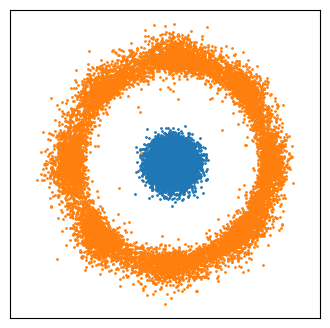

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
# plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, 0, 1], s=1, c=generated_path_discrete[:,0], cmap='tab10')
# plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, c=generated_path_discrete[:,-1], cmap='tab10')
plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, 0, 1], s=1, cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

## flow:

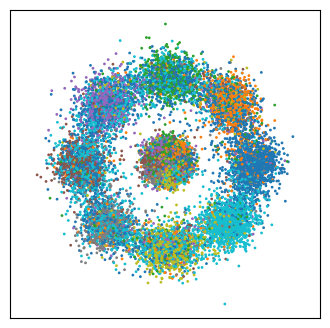

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, 0, 1], s=1, c=generated_path_discrete[:,0], cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, c=generated_path_discrete[:,-1], cmap='tab10')
# plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, -1, 1], s=1, c='b', cmap='tab10')
# plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, c='r', cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

## drift:


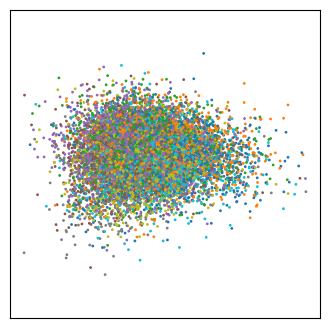

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
# plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, 0, 1], s=1, c=generated_path_discrete[:,0], cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, c=generated_path_discrete[:,-1], cmap='tab10')
# plt.scatter(generated_path_continuous[:, 0, 0], generated_path_continuous[:, -1, 1], s=1, c='b', cmap='tab10')
# plt.scatter(generated_path_continuous[:, -1, 0], generated_path_continuous[:, -1, 1], s=1, c='r', cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [ ]:
# count unique frequency generated_path_discrete

import numpy as np

unique, counts = np.unique(generated_path_discrete[:,-1], return_counts=True)

print(unique, counts/counts.sum())

[0. 1. 2. 3. 4. 5. 6. 7.] [0.37078125 0.041875   0.0321875  0.05085937 0.04757812 0.0384375
 0.04382813 0.37445312]


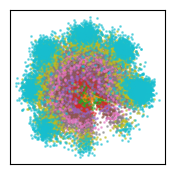

In [ ]:
import matplotlib.pyplot as plt



mask = generated_path_discrete[:,-1]==0
mask = mask.squeeze()
plt.figure(figsize=(2, 2))
for i in range(generated_path_continuous.shape[1]):    
    plt.scatter(generated_path_continuous[:, i, 0][mask], generated_path_continuous[:, i, 1][mask], s=1, alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

mask = generated_path_discrete[:,-1]==3
mask = mask.squeeze()

plt.figure(figsize=(4, 4))
plt.scatter(generated_path_continuous[:, 0, 0][mask], generated_path_continuous[:, 0, 1][mask], s=1, c='k', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 50, 0][mask], generated_path_continuous[:, 50, 1][mask], s=1, c='brown', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 100, 0][mask], generated_path_continuous[:, 100, 1][mask], s=1, c='darkred', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 150, 0][mask], generated_path_continuous[:, 150, 1][mask], s=1, c='red', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 200, 0][mask], generated_path_continuous[:, 200, 1][mask], s=1, c='darkred', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, 250, 0][mask], generated_path_continuous[:, 250, 1][mask], s=1, c='purple', alpha=0.5, cmap='tab10')
plt.scatter(generated_path_continuous[:, -1, 0][mask], generated_path_continuous[:, -1, 1][mask], s=1, c='b', alpha=0.5, cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()